# Multivariate Linear Regression

The dataset was obtained from https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905.

We're using multivariate linear regression to predict the price of an apartment/house from given input size and number of bedrooms. This model assumes that the data is linear, and in this case, forms a plane.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

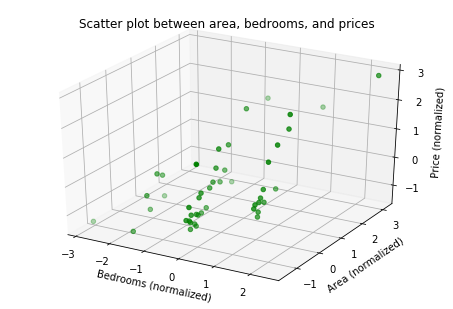

In [2]:
# read data and parse it
data = pd.read_csv('../datasets/multivariate_linear_regression.csv', 
                   names=["areas","bedrooms","prices"])
# normalizing the data to be between 0 to 1
data = (data - data.mean())/data.std()
bedrooms = data['bedrooms'].values
prices = data['prices'].values
areas = data['areas'].values

x = np.array([areas, bedrooms]).T
# another column with all ones is concatenated to x to make it easier
#  for computing inner products
ones = np.ones((x.shape[0], 1))
x = np.concatenate([ones, x], 1)
y = np.array(prices).reshape([-1, 1])
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Scatter plot between area, bedrooms, and prices')
ax.set_ylabel('Area (normalized)')
ax.set_xlabel('Bedrooms (normalized)')
ax.set_zlabel('Price (normalized)')
ax.scatter(bedrooms, areas, prices, color='green')

In [3]:
# Hyperparameters
epochs = 3000 # number of time steps
learning_rate = 0.001 # sensitivity between time steps

In [4]:
# estimates are of the form (a, b, c) in z = a + bx + cy
def calculateError(x, y, estimates):
    y_hat = x @ estimates.T # estimator for y value
    return ((y - y_hat) ** 2).mean() # MSE error between y and y_hat

def gradientDescent(x, y, estimates, learning_rate, epochs):
    error = np.zeros(epochs)
    for epoch in range(epochs):
        y_hat = x @ estimates.T
        # instantaneous increase in error = 2 * x_i * (y - y_hat)
        change = (2 * x * (y - y_hat)).mean(axis=0)
        # gradient descent step
        estimates = estimates + learning_rate * change
        error[epoch] = calculateError(x, y, estimates)
    return (estimates, error)

Estimates:  [[ 0.0024639   0.84947265 -0.0177644 ]]


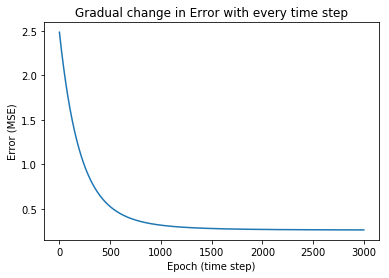

In [5]:
# Starting out with all coefficients being 1
estimates = np.ones((1, x.shape[1]))
estimates, error = gradientDescent(x, y, estimates, learning_rate, epochs)
print("Estimates: ", estimates)
plt.xlabel('Epoch (time step)')
plt.ylabel('Error (MSE)')
plt.title('Gradual change in Error with every time step')
plt.plot(np.arange(epochs), error)

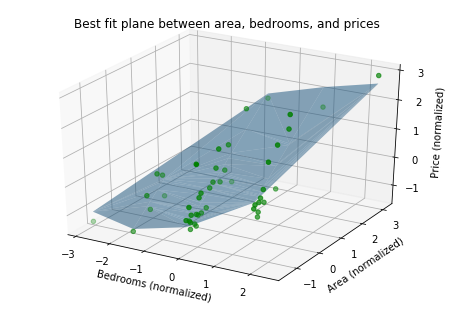

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Best fit plane between area, bedrooms, and prices')
ax.set_ylabel('Area (normalized)')
ax.set_xlabel('Bedrooms (normalized)')
ax.set_zlabel('Price (normalized)')
ax.scatter(bedrooms, areas, prices, color='green')
ax.plot_trisurf(bedrooms, areas, estimates[0][0] + estimates[0][1] * areas 
          + estimates[0][2] * bedrooms, alpha=0.5)
plt.savefig('../result-plots/multivariate_linear_regression.svg')